### MID-TERM PROJECT

In [55]:
#Import Libraries
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mutual_info_score
from sklearn.linear_model import RidgeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve

import re

import xgboost as xgb

In [56]:
df = pd.read_csv("C:/Users/Co/Desktop/ML_ZOOMCAMP Project/MonkeyPox.csv")

In [57]:
df.head()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,None,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,None,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive


In [58]:
df.dtypes

Patient_ID                        object
Systemic Illness                  object
Rectal Pain                         bool
Sore Throat                         bool
Penile Oedema                       bool
Oral Lesions                        bool
Solitary Lesion                     bool
Swollen Tonsils                     bool
HIV Infection                       bool
Sexually Transmitted Infection      bool
MonkeyPox                         object
dtype: object

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Patient_ID                      25000 non-null  object
 1   Systemic Illness                25000 non-null  object
 2   Rectal Pain                     25000 non-null  bool  
 3   Sore Throat                     25000 non-null  bool  
 4   Penile Oedema                   25000 non-null  bool  
 5   Oral Lesions                    25000 non-null  bool  
 6   Solitary Lesion                 25000 non-null  bool  
 7   Swollen Tonsils                 25000 non-null  bool  
 8   HIV Infection                   25000 non-null  bool  
 9   Sexually Transmitted Infection  25000 non-null  bool  
 10  MonkeyPox                       25000 non-null  object
dtypes: bool(8), object(3)
memory usage: 781.4+ KB


In [60]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [61]:
df.columns

Index(['patient_id', 'systemic_illness', 'rectal_pain', 'sore_throat',
       'penile_oedema', 'oral_lesions', 'solitary_lesion', 'swollen_tonsils',
       'hiv_infection', 'sexually_transmitted_infection', 'monkeypox'],
      dtype='object')

In [62]:
## let's drop the patien_id column which won't contribute to the model using domain knowldedge.
df.drop(['patient_id'],axis=1,inplace=True)

In [63]:
# data variables are object ar boolean

cat_cols = list(df.dtypes[df.dtypes == 'object'].index)
print(f'Columns with categorical variables are: {cat_cols} \n')


bool_cols = list(df.dtypes[df.dtypes == 'bool'].index)
print(f'Columns with boolean are: {bool_cols}')

Columns with categorical variables are: ['systemic_illness', 'monkeypox'] 

Columns with boolean are: ['rectal_pain', 'sore_throat', 'penile_oedema', 'oral_lesions', 'solitary_lesion', 'swollen_tonsils', 'hiv_infection', 'sexually_transmitted_infection']


In [64]:
#convert boolean to integers
df[bool_cols] = df[bool_cols].astype(int)
df[bool_cols]

,rectal_pain,sore_throat,penile_oedema,oral_lesions,solitary_lesion,swollen_tonsils,hiv_infection,sexually_transmitted_infection
0,0,1,1,1,0,1,0,0
1,1,0,1,1,0,0,1,0
2,0,1,1,0,0,0,1,0
3,1,0,0,0,1,1,1,0
4,1,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...
24995,1,1,0,1,1,0,0,1
24996,0,1,1,0,1,1,1,1
24997,1,1,0,0,1,1,0,0
24998,0,1,0,1,1,1,0,0


In [65]:
df.describe()

,rectal_pain,sore_throat,penile_oedema,oral_lesions,solitary_lesion,swollen_tonsils,hiv_infection,sexually_transmitted_infection
count,25000.000000,25000.000000,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000
mean,0.493800,0.502160,0.50448,0.49944,0.501080,0.501320,0.503360,0.497840
std,0.499972,0.500005,0.49999,0.50001,0.500009,0.500008,0.499999,0.500005
min,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.00000,0.00000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000


In [66]:
for col in df.columns:
    gra = df[col].value_counts()
    print(f'{col.upper()}: \n')
    print(gra)
    print('\n')
    

SYSTEMIC_ILLNESS: 

Fever                    6382
Swollen Lymph Nodes      6252
None                     6216
Muscle Aches and Pain    6150
Name: systemic_illness, dtype: int64


RECTAL_PAIN: 

0    12655
1    12345
Name: rectal_pain, dtype: int64


SORE_THROAT: 

1    12554
0    12446
Name: sore_throat, dtype: int64


PENILE_OEDEMA: 

1    12612
0    12388
Name: penile_oedema, dtype: int64


ORAL_LESIONS: 

0    12514
1    12486
Name: oral_lesions, dtype: int64


SOLITARY_LESION: 

1    12527
0    12473
Name: solitary_lesion, dtype: int64


SWOLLEN_TONSILS: 

1    12533
0    12467
Name: swollen_tonsils, dtype: int64


HIV_INFECTION: 

1    12584
0    12416
Name: hiv_infection, dtype: int64


SEXUALLY_TRANSMITTED_INFECTION: 

0    12554
1    12446
Name: sexually_transmitted_infection, dtype: int64


MONKEYPOX: 

Positive    15909
Negative     9091
Name: monkeypox, dtype: int64




In [67]:
df['monkeypox'] = df['monkeypox'].replace(['Positive', 'Negative'], [1, 0])

In [68]:
df.monkeypox.value_counts()

1    15909
0     9091
Name: monkeypox, dtype: int64

In [69]:
df.dtypes

systemic_illness                  object
rectal_pain                        int32
sore_throat                        int32
penile_oedema                      int32
oral_lesions                       int32
solitary_lesion                    int32
swollen_tonsils                    int32
hiv_infection                      int32
sexually_transmitted_infection     int32
monkeypox                          int64
dtype: object

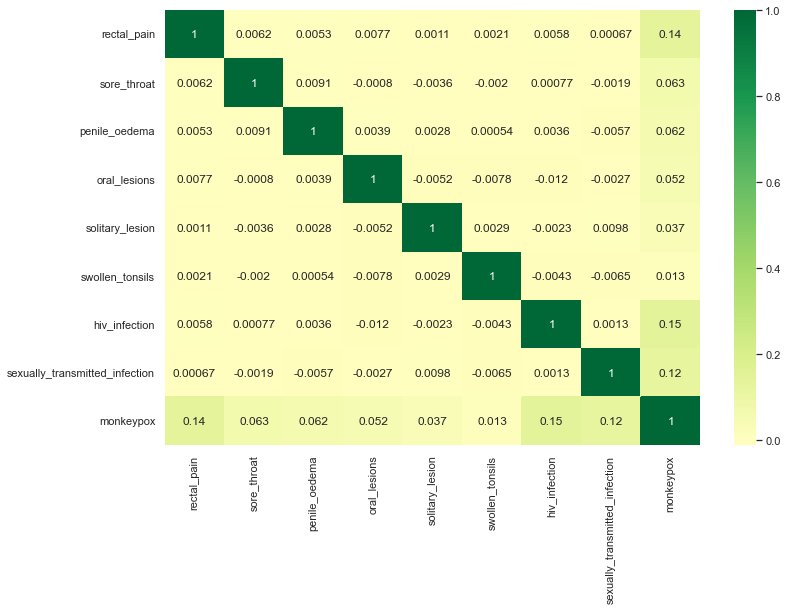

In [70]:
# Let's check the multicollinearity of features by checking the correlation matric

plt.figure(figsize=(12,8))
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',center=0) 

### Validation, Testing and Prediction

In [71]:
# split data set to 60/20/20 for validation and testing
data_full_train, data_test = train_test_split(df, test_size=0.2, random_state=42)
data_train, data_val = train_test_split(data_full_train, test_size=0.25, random_state=42)

In [72]:
len(data_train), len(data_val), len(data_test)

(15000, 5000, 5000)

In [73]:
y_train = data_train.monkeypox.values
y_val = data_val.monkeypox.values
y_test = data_test.monkeypox.values

del data_train['monkeypox']
del data_val['monkeypox']
del data_test['monkeypox']

In [74]:
bool_cols

['rectal_pain',
 'sore_throat',
 'penile_oedema',
 'oral_lesions',
 'solitary_lesion',
 'swollen_tonsils',
 'hiv_infection',
 'sexually_transmitted_infection']

#### Check AUC score

In [75]:
# bool_cols

In [76]:
# from sklearn.metrics import roc_auc_score

for cols in bool_cols:
    rauc = roc_auc_score(y_train, data_train[cols])
    if rauc < 0.5: #if variable is negatively correlated
        rauc = roc_auc_score(y_train, -data_train[cols])
    print(f'{cols}, {rauc:.3}')

rectal_pain, 0.57
sore_throat, 0.532
penile_oedema, 0.529
oral_lesions, 0.528
solitary_lesion, 0.522
swollen_tonsils, 0.508
hiv_infection, 0.581
sexually_transmitted_infection, 0.564


In [77]:
# cat_cols = cat_cols[0]

In [78]:
# from sklearn.metrics import mutual_info_score

In [79]:
mut_score = mutual_info_score(y_train, data_train.systemic_illness)
print(f'Systemic Illness has a mutual_score of {mut_score}')
print()

Systemic Illness has a mutual_score of 0.02363286781639909



In [80]:
dv = DictVectorizer(sparse=False)

train_dict = data_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict).astype(int)

val_dict = data_val.to_dict(orient='records')
X_val = dv.transform(val_dict).astype(int)

In [81]:
X_train.shape

(15000, 12)

#### Precision and Recall for models

In [82]:
# models to test
classifiers = [
    LogisticRegression(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    RidgeClassifier(),
]
# get names of the objects in list (too lazy for c&p...)
names = [re.match(r"[^\(]+", name.__str__())[0] for name in classifiers]
print(f"Classifiers to test: {names}")

Classifiers to test: ['LogisticRegression', 'RandomForestClassifier', 'DecisionTreeClassifier', 'RidgeClassifier']


In [83]:
%%time
# test all classifiers and save pred. results on test data
results = {}
for name, clf in zip(names, classifiers):
    print(f"Training classifier: {name}")
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_val)
    report = classification_report(y_val, prediction)
    results[name] = report

Training classifier: LogisticRegression
Training classifier: RandomForestClassifier
Training classifier: DecisionTreeClassifier
Training classifier: RidgeClassifier
Wall time: 1.21 s


In [84]:
# Prediction results
for k, v in results.items():
    print(f"Results for {k}:")
    print(f"{v}\n")

Results for LogisticRegression:
              precision    recall  f1-score   support

           0       0.62      0.38      0.47      1873
           1       0.70      0.86      0.77      3127

    accuracy                           0.68      5000
   macro avg       0.66      0.62      0.62      5000
weighted avg       0.67      0.68      0.66      5000


Results for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.57      0.38      0.46      1873
           1       0.69      0.83      0.75      3127

    accuracy                           0.66      5000
   macro avg       0.63      0.61      0.61      5000
weighted avg       0.65      0.66      0.64      5000


Results for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.55      0.41      0.47      1873
           1       0.69      0.80      0.74      3127

    accuracy                           0.65      5000
   macro avg       0.6

### Fine-tuning the Models

##### Logistic Regression

In [85]:
for i in range(100, 210, 10):
    print(f'for {i} \n')
    for n in range(1, 11, 1):
        lr = LogisticRegression(solver='liblinear', C= n, max_iter= i)

        lr.fit(X_train, y_train)

        lr_score = lr.score(X_val, y_val)

        print(f'C:{n} has an accuracy score: {lr_score} \n')

for 100 

C:1 has an accuracy score: 0.6824 

C:2 has an accuracy score: 0.6826 

C:3 has an accuracy score: 0.6826 

C:4 has an accuracy score: 0.6826 

C:5 has an accuracy score: 0.6826 

C:6 has an accuracy score: 0.6826 

C:7 has an accuracy score: 0.6826 

C:8 has an accuracy score: 0.6826 

C:9 has an accuracy score: 0.6826 

C:10 has an accuracy score: 0.6826 

for 110 

C:1 has an accuracy score: 0.6824 

C:2 has an accuracy score: 0.6826 

C:3 has an accuracy score: 0.6826 

C:4 has an accuracy score: 0.6826 

C:5 has an accuracy score: 0.6826 

C:6 has an accuracy score: 0.6826 

C:7 has an accuracy score: 0.6826 

C:8 has an accuracy score: 0.6826 

C:9 has an accuracy score: 0.6826 

C:10 has an accuracy score: 0.6826 

for 120 

C:1 has an accuracy score: 0.6824 

C:2 has an accuracy score: 0.6826 

C:3 has an accuracy score: 0.6826 

C:4 has an accuracy score: 0.6826 

C:5 has an accuracy score: 0.6826 

C:6 has an accuracy score: 0.6826 

C:7 has an accuracy score: 0.682

##### Highest accuracy score of 0.6826 with  `max_iter = 100 and C=2.0`

In [86]:
model = LogisticRegression(solver='liblinear', C= 2, max_iter= 100)
model.fit(X_train, y_train)
lr_pred = model.predict(X_val)
lr_class = classification_report(y_val, lr_pred)
print(lr_class)

              precision    recall  f1-score   support

           0       0.62      0.38      0.48      1873
           1       0.70      0.86      0.77      3127

    accuracy                           0.68      5000
   macro avg       0.66      0.62      0.62      5000
weighted avg       0.67      0.68      0.66      5000



##### Random Forest

In [87]:
for depth in [5,10,15,20]:
    print(f'For max-depth {depth}: \n')
    for n in range(10, 201, 10):
        model = RandomForestClassifier(n_estimators=n, random_state=42, n_jobs=-1, max_depth = depth)
        model.fit(X_train, y_train)
        rf_score = model.score(X_val, y_val)
        print(f'{n} estimator has an accuray_score: {rf_score}')
    print('--------------- \n')

For max-depth 5: 

10 estimator has an accuray_score: 0.6776
20 estimator has an accuray_score: 0.6798
30 estimator has an accuray_score: 0.68
40 estimator has an accuray_score: 0.6806
50 estimator has an accuray_score: 0.6816
60 estimator has an accuray_score: 0.68
70 estimator has an accuray_score: 0.6798
80 estimator has an accuray_score: 0.6808
90 estimator has an accuray_score: 0.68
100 estimator has an accuray_score: 0.681
110 estimator has an accuray_score: 0.6808
120 estimator has an accuray_score: 0.6818
130 estimator has an accuray_score: 0.6804
140 estimator has an accuray_score: 0.6784
150 estimator has an accuray_score: 0.6802
160 estimator has an accuray_score: 0.6804
170 estimator has an accuray_score: 0.6794
180 estimator has an accuray_score: 0.6796
190 estimator has an accuray_score: 0.6794
200 estimator has an accuray_score: 0.6806
--------------- 

For max-depth 10: 

10 estimator has an accuray_score: 0.6634
20 estimator has an accuray_score: 0.67
30 estimator has 

##### Highest accuracy score of 0.6818 with  `max_depth = 5 and n_estimator=120`

In [88]:
model = RandomForestClassifier(n_estimators=120, random_state=42, n_jobs=-1, max_depth = 5)
model.fit(X_train, y_train)
rf_pred = model.predict(X_val)
rf_class = classification_report(y_val, rf_pred)
print(rf_class)

              precision    recall  f1-score   support

           0       0.68      0.29      0.40      1873
           1       0.68      0.92      0.78      3127

    accuracy                           0.68      5000
   macro avg       0.68      0.60      0.59      5000
weighted avg       0.68      0.68      0.64      5000



#### Decision Tree

In [89]:
for depth in [10,15,20,25]:
    print(f'For max-depth {depth}: \n')
    for n in range(10, 201, 10):
        model = DecisionTreeClassifier(max_depth=depth, max_leaf_nodes=n, random_state=42)
        model.fit(X_train, y_train)
        rf_score = model.score(X_val, y_val)
        print(f'with max_leaf_nodes, {n} has an accuray_score: {rf_score}')
    print('--------------- \n')

For max-depth 10: 

with max_leaf_nodes, 10 has an accuray_score: 0.6738
with max_leaf_nodes, 20 has an accuray_score: 0.679
with max_leaf_nodes, 30 has an accuray_score: 0.6838
with max_leaf_nodes, 40 has an accuray_score: 0.683
with max_leaf_nodes, 50 has an accuray_score: 0.6794
with max_leaf_nodes, 60 has an accuray_score: 0.6774
with max_leaf_nodes, 70 has an accuray_score: 0.6774
with max_leaf_nodes, 80 has an accuray_score: 0.6766
with max_leaf_nodes, 90 has an accuray_score: 0.6768
with max_leaf_nodes, 100 has an accuray_score: 0.678
with max_leaf_nodes, 110 has an accuray_score: 0.6808
with max_leaf_nodes, 120 has an accuray_score: 0.6804
with max_leaf_nodes, 130 has an accuray_score: 0.6822
with max_leaf_nodes, 140 has an accuray_score: 0.6792
with max_leaf_nodes, 150 has an accuray_score: 0.679
with max_leaf_nodes, 160 has an accuray_score: 0.679
with max_leaf_nodes, 170 has an accuray_score: 0.68
with max_leaf_nodes, 180 has an accuray_score: 0.6814
with max_leaf_nodes, 190

##### Highest accuracy score of 0.6838 with  `max_depth = 10 and max_leaf_nodes=30`

In [90]:
model = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=30, random_state=42)
model.fit(X_train, y_train)
dt_pred = model.predict(X_val)
dt_class = classification_report(y_val, dt_pred)
print(dt_class)

              precision    recall  f1-score   support

           0       0.65      0.34      0.44      1873
           1       0.69      0.89      0.78      3127

    accuracy                           0.68      5000
   macro avg       0.67      0.61      0.61      5000
weighted avg       0.68      0.68      0.65      5000



In [91]:
# from sklearn.linear_model import RidgeClassifier

In [92]:
for i in [0.001, 0.01, 0.1, 1, 10]:
    rcl = RidgeClassifier(solver="sag", alpha=0.01, random_state=42)

    rcl.fit(X_train, y_train)

    rcl_score = rcl.score(X_val, y_val)

    print(f'for alpha = {i}, accuracy score is {rcl_score}')

for alpha = 0.001, accuracy score is 0.6822
for alpha = 0.01, accuracy score is 0.6822
for alpha = 0.1, accuracy score is 0.6822
for alpha = 1, accuracy score is 0.6822
for alpha = 10, accuracy score is 0.6822


##### Highest accuracy score of 0.6826

In [93]:
model = RidgeClassifier(solver="sag", alpha=0.01, random_state=42)
model.fit(X_train, y_train)
rd_pred = model.predict(X_val)
rd_class = classification_report(y_val, rd_pred)
print(rd_class)

              precision    recall  f1-score   support

           0       0.63      0.38      0.47      1873
           1       0.70      0.86      0.77      3127

    accuracy                           0.68      5000
   macro avg       0.66      0.62      0.62      5000
weighted avg       0.67      0.68      0.66      5000



### Precison vs. Recall Plot

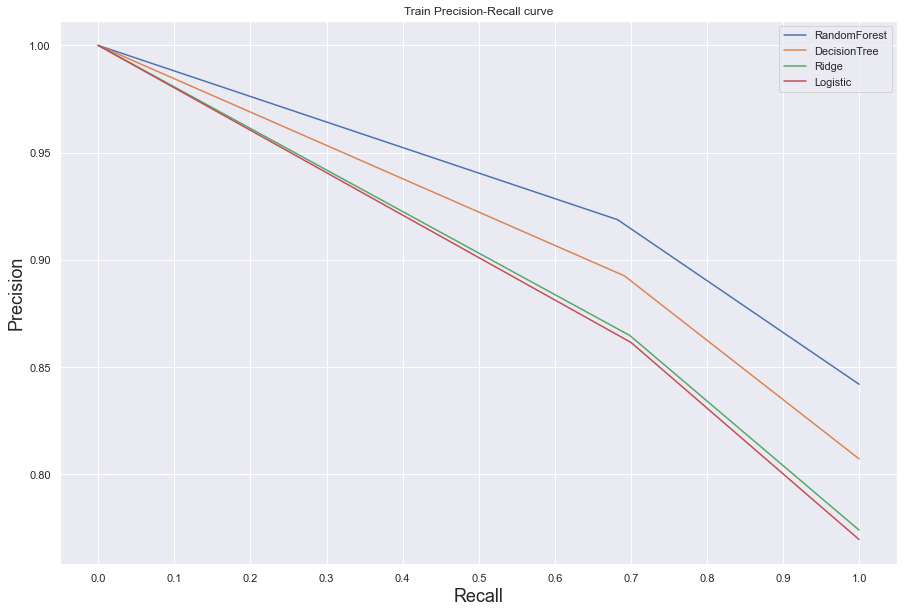

In [94]:
plt.figure(figsize=(15,10))

dt_precision, dt_recall, dt_thresholds = precision_recall_curve(dt_pred,y_val)
rf_precision, rf_recall, rf_thresholds = precision_recall_curve(rf_pred,y_val)
lr_precision, lr_recall, lr_thresholds = precision_recall_curve(lr_pred,y_val)
rd_precision, rd_recall, rd_thresholds = precision_recall_curve(rd_pred,y_val)


plt.plot(rf_recall, rf_precision, label='RandomForest')
plt.plot(dt_recall, dt_precision, label="DecisionTree")
plt.plot(rd_recall, rd_precision, label='Ridge')
plt.plot(lr_recall, lr_precision, label='Logistic')


plt.ylabel("Precision", size=18)
plt.xlabel("Recall", size=18)
plt.title("Precision_Recall Curve")
plt.legend()
plt.xticks(np.arange(0,1.1,0.1))
plt.title("Train Precision-Recall curve");
plt.show()

##### Based on the `Precision_Recall Curve`, the model for RandomForest performs the best

### Prediction

In [95]:
cat_col = ['systemic_illness']
cat_col

['systemic_illness']

In [96]:
# dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [97]:
dicts_full_train = data_full_train[bool_cols + cat_col].to_dict(orient='records')

In [98]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train).astype(int)

In [99]:
y_full_train = data_full_train.monkeypox.values

In [100]:
modelrf = RandomForestClassifier(n_estimators=120, random_state=42, n_jobs=-1, max_depth = 5)
modelrf.fit(X_full_train, y_full_train)


RandomForestClassifier(max_depth=5, n_estimators=120, n_jobs=-1,
                       random_state=42)

In [101]:
dicts_test = data_test[bool_cols + cat_col].to_dict(orient='records')
X_test = dv.transform(dicts_test).astype(int)

In [102]:
rfp_pred = modelrf.predict(X_test)
rfp_class = classification_report(y_test, rfp_pred)
rfp_score = accuracy_score(y_test, rfp_pred)
print(rf_class)
print(f'\n Improved accuracy score of {rfp_score} with RandomForest Classifier')

              precision    recall  f1-score   support

           0       0.68      0.29      0.40      1873
           1       0.68      0.92      0.78      3127

    accuracy                           0.68      5000
   macro avg       0.68      0.60      0.59      5000
weighted avg       0.68      0.68      0.64      5000


 Improved accuracy score of 0.701 with RandomForest Classifier


In [103]:
# import pickle
# # open a file, where you ant to store the data
# file = open('model.pkl', 'wb')

# # dump information to that file
# pickle.dump(modelrf, file)

In [104]:
# model = open('model.pkl','rb')
# forest = pickle.load(model)

In [105]:
# X_train.shape

In [106]:
# pickle_rand = forest.predict([[0,0,0,1,0,0,0,0,0,1,0,1]])
# print(pickle_rand)